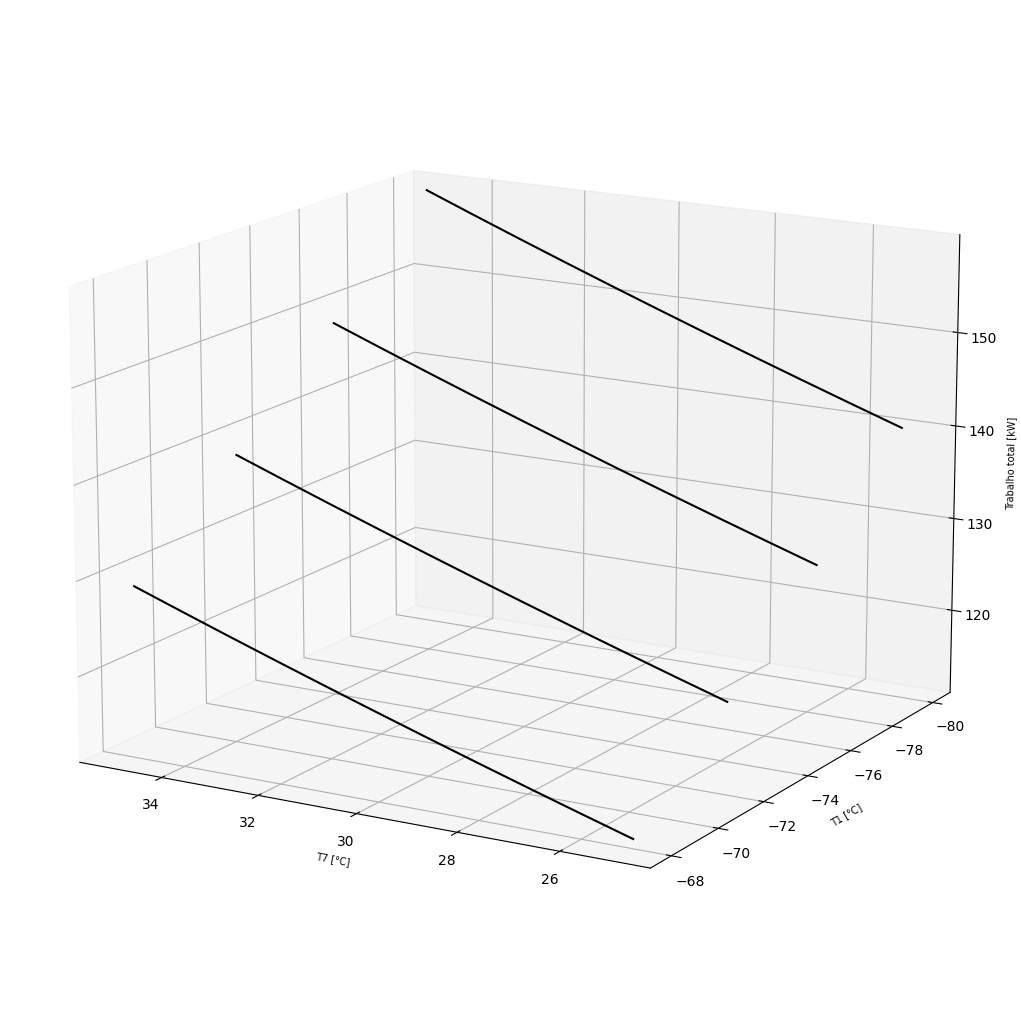

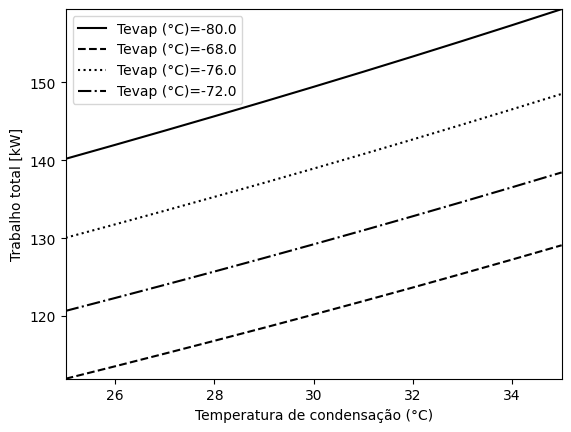

In [2]:
from CoolProp.CoolProp import PropsSI as COOLPROP
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import math
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Listas
T1_lista = []
T7_lista = []
Wcomp_total_lista = []
COP_lista = []
cont = []

#Temperaturas de condensação
for i in range (25, 36, 1):
    cont.append(i+273.15)

#Parâmetros
Pfrig = 120 * 1000 #[W]
T3 = -24 + 273.15 #[K]
T8 = -29 + 273.15 #[K]
fluid_high = 'R600'
fluid_low = 'R170'
N = 0.7
drop_desc = 0

#Pressão crítica do fluido do ciclo de alta pressão
P_crit_high = COOLPROP('PCRIT', fluid_high)

#Ciclo de baixa pressão
P3 = COOLPROP('P', 'T', T3, 'Q', 0 , fluid_low)
P2 = P3
Pc = P2 + drop_desc
h3 = COOLPROP('H', 'T', T3, 'Q', 0, fluid_low)
h4 = h3



#Variação das temperaturas de evaporação e condensação
for T1 in range (-80, -67, 4):
    #Ciclo de baixa pressão
    T1 = T1 + 273.15
    P1 = COOLPROP('P', 'T', T1, 'Q', 1, fluid_low)
    r1 = P2/P1
    h1 = COOLPROP('H', 'T', T1, 'Q', 1, fluid_low)
    S1 = COOLPROP('S', 'T', T1, 'Q', 1, fluid_low)
    m_flow_low = Pfrig / (h1 - h4)
    S2_ideal = S1    
    h2_ideal = COOLPROP('H', 'S', S2_ideal , 'P', P2, fluid_low)
    h2_real = (h2_ideal - h1)/N + h1
    #Trabalho específico no compressor do ciclo de baixa pressão
    w_low = h2_real - h1
    #Trabalho no compressor do ciclo de baixa pressão
    Wcomp_low = m_flow_low * w_low
    #Calor trocado no trocador central
    Qcond_low =  m_flow_low * (h2_real - h3)
    for T7 in cont:
        #Ciclo de alta pressão
        Qevap_high = Qcond_low
        h7 = COOLPROP('H', 'T', T7, 'Q', 0, fluid_high)
        h8 = h7
        P8 = COOLPROP('P', 'T', T8, 'Q', 1, fluid_high)
        P5 = P8
        h5 = COOLPROP('H', 'P', P5, 'Q', 1, fluid_high)
        s5 = COOLPROP('S', 'P', P5, 'Q', 1, fluid_high)
        P7 = COOLPROP('P', 'T', T7, 'Q', 0, fluid_high)
        P6 = P7
        s6_ideal = s5
        h6_ideal = COOLPROP('H', 'P', P6, 'S', s6_ideal, fluid_high)
        h6_real = (h6_ideal - h5)/N + h5
        Py = P6 + drop_desc
        m_flow_high = Qevap_high / (h5 - h8)
        #Verificação da pressão crítica
        if P_crit_high > P6:
            T1_lista.append(T1 - 273.15)
            T7_lista.append(T7 - 273.15)
            #Trabalho específico no compressor do ciclo de alta pressão
            w_high = h6_real - h5
            #Trabalho no compressor do ciclo de alta pressão
            Wcomp_high = m_flow_high * w_high
            #Trabalho total
            Wcomp_total = Wcomp_low + Wcomp_high
            Wcomp_total_lista.append(Wcomp_total / 1000)
            #COP
            COP = Pfrig / Wcomp_total
            COP_lista.append(COP)

        else:
            print ('A pressão P6 = {:0.2f} kPa (T1 = {:0.2f}°C, T7 = {:0.2f}°C) é maior do que a ' 
               'pressão crítica do {} logo o ponto não foi incluído no gráfico'
                   .format(P6/1000,T1-273.15,T7-273.15,fluid_high))


x = T7_lista
z = T1_lista
y = Wcomp_total_lista

# Define um dicionário que mapeia os valores de z para estilos de linha diferentes
z_linestyles = {z_val: linestyle for z_val, linestyle in zip(set(z), ['-','--', ':', '-.'])}

# Cria uma figura com um gráfico 2D
fig, ax = plt.subplots()

# Itera sobre os valores únicos de z
for z_val in set(z):
    # Seleciona os pontos correspondentes a z_val
    x_val = [x[i] for i in range(len(x)) if z[i] == z_val]
    y_val = [y[i] for i in range(len(y)) if z[i] == z_val]

    # Plota os pontos com uma linha ligando eles
    ax.plot(x_val, y_val, linestyle=z_linestyles[z_val], color='black', label=f'Tevap (°C)={z_val}')

# Define os limites dos eixos X e Y
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

# Define os rótulos dos eixos X e Y
ax.set_xlabel('Temperatura de condensação (°C)')
ax.set_ylabel('Trabalho total [kW]')

# Adiciona a legenda
ax.legend()


# Mostra o gráfico
plt.show()


